## Demostration of an antireflecting coating

In [1]:
import matplotlib.pyplot as plt
import numpy as np

j = complex(0,1)
wl= np.arange(300.0, 2001.0, 1.0) #<---Wavelengths in interval

We define a function that takes as input:

* N1, refractive index of the medium
* N2, refractive index of the film
* N3, refractive index of the substrate
* d, thickness of the thin film

and returs the reflectance of the system film + substrate:
    

In [2]:
def R(N1,N2,N3,d):
	delta= -(2.0*np.pi/wl)*N2*d
	r1= (N1-N2)/(N1+N2)
	r2= (N2-N3)/(N2+N3)
	t1 = 2*N1/(N1+N2)
	t2 = 2*N2/(N2+N3)
	r =(r1+r2*np.exp(-2*j*delta))/(1.0+r1*r2*np.exp(-2*j*delta))
	return abs(r)*abs(r)*100	

Define the refractive index of the medium and of the substrate

In [3]:
n_air = 1
n_substrate = 1.50

We define the refractive index of the film as the square root of the substrate

In [4]:
n_film = n_substrate**0.5

We define the thickness in nanometers:

In [5]:
thickness = 500 # in nm

Plot the refractive index of our layer stack

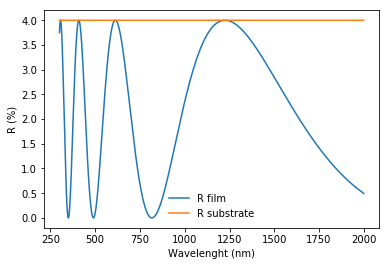

In [6]:
plt.plot(wl,R(n_air, n_film, n_substrate, thickness), label='R film')
plt.plot(wl,R(n_air, n_air, n_substrate, thickness), label='R substrate')
plt.xlabel("Wavelenght (nm)")
plt.ylabel("R (%)")
plt.legend(loc='best', fontsize= 10,frameon=False)
plt.show()

In [7]:
from ipywidgets import interactive

In [8]:
def draw_graph(N2, d): 
    plt.plot(wl,R(n_air, N2, n_substrate, d), label='R film')
    plt.plot(wl,R(n_air, n_air, n_substrate, thickness), label='R substrate')
    plt.legend(loc='best', fontsize= 10,frameon=False)
    plt.xlabel("Wavelenght (nm)")
    plt.ylabel("R (%)")
    plt.ylim([0,12])
    
    plt.show()
    

In [10]:
interactive_plot = interactive(draw_graph, N2=(1.0,1.7,0.1),d =(0,500,50))
output = interactive_plot.children[-1]
output.layout.height = '1250px'
interactive_plot 

interactive(children=(FloatSlider(value=1.3, description='N2', max=1.7, min=1.0), IntSlider(value=250, descrip…